## Final Project Submission

Please fill out:
* Student name: Omega Markos
* Student pace: Part time
* Scheduled project review date/time: 
* Instructor name: Pablo
* Blog post URL: https://medium.com/@omegaghirmay/the-explanatory-data-analysis-steps-664d17d44b52
* Video link: https://drive.google.com/file/d/1pRnthkh3DTnG85zH9MevV6EBu-Mzrwje/view?usp=sharing


In [1]:
# import all the necessary libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_columns = 999 # this helps to see more columns specially when you add dummy variables. 

In [2]:
kchouse = pd.read_csv ("kc_house_data.csv" )# read data
kchouse.info() # To have a general idea of the data such as data types, name & number of columns & missing values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB



description of the column

**id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors


# Data cleaning


##### Tidying data for analysis: check for missing, duplicate & extraneous value.

### Checking for missing values

In [3]:
kchouse.isna().sum() # checking for missing values

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

##### There are substential missing values in the 'waterfront' & 'yr_renovated' columns and few missing values in the "view' column.

### Replacing missing values

Mssing values are replaced by 0 which is the mode & median  value of the columns

In [4]:
kchouse.view.fillna(value = 0, inplace = True)  

In [5]:
kchouse.yr_renovated.fillna(value= 0, inplace = True)

In [6]:
kchouse.waterfront.fillna(value= 0 , inplace = True)

In [7]:
kchouse.isna().sum() # checking for missing values again after replacing

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### Checking & replacing extraneous values

In [8]:
# to check for extraneous values in the columns. 
for col in kchouse.columns:
    print (col,'\n', kchouse[col]. value_counts(normalize= True).head(), '\n\n')

id 
 795000620     0.000139
1825069031    0.000093
2019200220    0.000093
7129304540    0.000093
1781500435    0.000093
Name: id, dtype: float64 


date 
 6/23/2014    0.006575
6/26/2014    0.006066
6/25/2014    0.006066
7/8/2014     0.005880
4/27/2015    0.005834
Name: date, dtype: float64 


price 
 350000.0    0.007964
450000.0    0.007964
550000.0    0.007362
500000.0    0.007038
425000.0    0.006945
Name: price, dtype: float64 


bedrooms 
 3    0.454878
4    0.318655
2    0.127796
5    0.074131
6    0.012594
Name: bedrooms, dtype: float64 


bathrooms 
 2.50    0.248970
1.00    0.178312
1.75    0.141131
2.25    0.094782
2.00    0.089364
Name: bathrooms, dtype: float64 


sqft_living 
 1300    0.006390
1400    0.006251
1440    0.006158
1660    0.005973
1010    0.005973
Name: sqft_living, dtype: float64 


sqft_lot 
 5000    0.016576
6000    0.013428
4000    0.011622
7200    0.010187
7500    0.005510
Name: sqft_lot, dtype: float64 


floors 
 1.0    0.494189
2.0    0.381303
1.5    

In [10]:
kchouse.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.006760,0.233181,3.409825,7.657915,1788.596842,1970.999676,68.758207,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.081944,0.764673,0.650546,1.173200,827.759761,29.375234,364.037499,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


###### On checking for extraneous data, It shows that 2.1% of the 'sqft_basement' is '?' and it is replaced by the median which is 0.

In [13]:
kchouse['sqft_basement'].replace(to_replace="?", value=0, inplace=True) #replace the '?'with 0

In [15]:
kchouse.sqft_basement.value_counts(normalize=True).head() # to check if it is replaced 

0.0      0.593879
0        0.021021
600.0    0.010048
500.0    0.009677
700.0    0.009631
Name: sqft_basement, dtype: float64

In [14]:
kchouse['sqft_basement'].astype(float) # the type was object

0           0.0
1         400.0
2           0.0
3         910.0
4           0.0
5        1530.0
6           0.0
7           0.0
8         730.0
9           0.0
10       1700.0
11        300.0
12          0.0
13          0.0
14          0.0
15        970.0
16          0.0
17          0.0
18          0.0
19          0.0
20        760.0
21        720.0
22          0.0
23          0.0
24          0.0
25          0.0
26        700.0
27          0.0
28        730.0
29          0.0
          ...  
21567       0.0
21568     320.0
21569       0.0
21570       0.0
21571       0.0
21572     190.0
21573       0.0
21574    1800.0
21575       0.0
21576       0.0
21577       0.0
21578       0.0
21579      50.0
21580       0.0
21581       0.0
21582       0.0
21583       0.0
21584       0.0
21585       0.0
21586       0.0
21587       0.0
21588       0.0
21589       0.0
21590     910.0
21591     130.0
21592       0.0
21593       0.0
21594       0.0
21595       0.0
21596       0.0
Name: sqft_basement, Len

##### Checking for duplicates

In [16]:
kchouse.duplicated().sum() # checking for duplicates

0

There are no duplicate values. 

# Explanatory Data Analysis


In [ ]:
kchouse.describe() # checking summary of statistics of the data.

The median sale price is 450k with the lowest 78k & highest 7.7 million. 

There is a big difference between the mean & the median price that is because the mean is affected by the few outliers in the data. 
More than 50% of the houses sold are 3 bedrooms. 
The max square footage of the house is 13540 & the min is 370
The oldest house was built in 1900 & the recent one is in 2015.

In [17]:
kchouse_abvm= kchouse[kchouse['price']>= 1000000]# to see info for expensive houses

In [18]:
kchouse_abvm.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.490000e+03,1.490000e+03,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000
mean,4.180097e+09,1.527732e+06,4.067785,3.158557,3780.119463,23129.119463,1.807718,0.065101,1.208725,3.479866,9.741611,3095.538255,1974.284564,195.834899,98069.317450,47.617811,-122.223760,3052.278523,17938.433557
std,2.826517e+09,6.271621e+05,0.904490,0.868389,1194.230170,56689.785707,0.486667,0.246786,1.523509,0.714381,1.218152,1129.828608,32.689406,594.384911,55.445778,0.060177,0.114033,849.588861,36529.055140
min,3.100016e+07,1.000000e+06,1.000000,1.000000,1330.000000,609.000000,1.000000,0.000000,0.000000,1.000000,6.000000,1040.000000,1900.000000,0.000000,98004.000000,47.329300,-122.451000,1050.000000,1224.000000
25%,1.724069e+09,1.150000e+06,4.000000,2.500000,2972.500000,6891.000000,1.500000,0.000000,0.000000,3.000000,9.000000,2200.000000,1951.000000,0.000000,98027.000000,47.574750,-122.292000,2440.000000,6300.000000
50%,3.625650e+09,1.330000e+06,4.000000,3.250000,3640.000000,10871.000000,2.000000,0.000000,0.000000,3.000000,10.000000,2900.000000,1985.000000,0.000000,98053.000000,47.627250,-122.224000,2985.000000,10404.000000
75%,6.613001e+09,1.680000e+06,5.000000,3.500000,4360.000000,18702.000000,2.000000,0.000000,3.000000,4.000000,11.000000,3830.000000,2003.000000,0.000000,98112.000000,47.652850,-122.158000,3600.000000,16624.000000
max,9.831201e+09,7.700000e+06,10.000000,8.000000,13540.000000,920423.000000,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.773500,-121.731000,6210.000000,858132.000000


In [19]:
kchouse_abvfm= kchouse[kchouse['price']>= 4000000] # to see info for expensive houses

In [20]:
kchouse_abvfm.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.200000e+01,1.200000e+01,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,5.997905e+09,5.404167e+06,5.083333,5.750000,8484.166667,28700.916667,1.958333,0.416667,2.083333,3.166667,12.166667,6494.166667,1987.500000,499.750000,98042.083333,47.626133,-122.231083,3851.666667,21521.666667
std,2.951711e+09,1.203710e+06,0.668558,1.356801,1686.833819,9607.940111,0.334279,0.514929,1.928652,0.389249,0.577350,1286.110827,30.702384,904.094235,44.835981,0.052648,0.036430,592.096941,8953.525454
min,1.247600e+09,4.000000e+06,4.000000,3.000000,6430.000000,13068.000000,1.000000,0.000000,0.000000,3.000000,11.000000,4820.000000,1910.000000,0.000000,98004.000000,47.557000,-122.323000,3030.000000,8800.000000
25%,3.494150e+09,4.497500e+06,5.000000,5.187500,7312.500000,23373.750000,2.000000,0.000000,0.000000,3.000000,12.000000,5707.500000,1989.000000,0.000000,98005.500000,47.603625,-122.234750,3390.000000,15645.000000
50%,6.605000e+09,5.205000e+06,5.000000,5.625000,8005.000000,27558.500000,2.000000,0.000000,2.500000,3.000000,12.000000,6275.000000,2001.000000,0.000000,98039.000000,47.626050,-122.219500,3825.000000,22579.000000
75%,8.030751e+09,5.900000e+06,5.250000,6.187500,9702.500000,35633.000000,2.000000,1.000000,4.000000,3.000000,12.250000,6960.000000,2003.250000,496.750000,98040.000000,47.635375,-122.210750,4375.000000,24826.500000
max,9.808701e+09,7.700000e+06,6.000000,8.000000,12050.000000,45517.000000,2.500000,1.000000,4.000000,4.000000,13.000000,8860.000000,2009.000000,2009.000000,98155.000000,47.749300,-122.189000,4740.000000,42730.000000


In [21]:
kchouse_belm= kchouse[kchouse['price'] < 450000] # houses below averge price 

In [22]:
kchouse_belm.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.067900e+04,10679.000000,10679.000000,10679.000000,10679.000000,1.067900e+04,10679.000000,10679.000000,10679.000000,10679.000000,10679.000000,10679.000000,10679.000000,10679.000000,10679.000000,10679.000000,10679.000000,10679.000000,10679.000000
mean,4.533674e+09,316938.837063,3.131848,1.809275,1620.433936,1.155585e+04,1.365858,0.000843,0.067516,3.386928,7.044293,1434.304523,1970.117239,40.655867,98079.502950,47.501476,-122.222523,1666.393202,10562.370072
std,2.835335e+09,78825.709849,0.831369,0.644622,557.529061,2.768195e+04,0.512313,0.029020,0.393371,0.638499,0.776001,516.533190,26.744098,281.657209,56.644819,0.152374,0.137572,442.244327,20731.997081
min,1.000102e+06,78000.000000,1.000000,0.500000,370.000000,5.720000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.512000,460.000000,651.000000
25%,2.121525e+09,257600.000000,3.000000,1.000000,1210.000000,5.246500e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1060.000000,1952.000000,0.000000,98031.000000,47.369550,-122.328000,1340.000000,5351.000000
50%,3.845100e+09,320000.000000,3.000000,1.750000,1550.000000,7.560000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1320.000000,1969.000000,0.000000,98058.000000,47.492000,-122.260000,1590.000000,7605.000000
75%,7.252100e+09,381328.000000,4.000000,2.500000,1970.000000,9.749000e+03,2.000000,0.000000,0.000000,4.000000,7.000000,1700.000000,1992.000000,0.000000,98125.000000,47.619100,-122.157000,1940.000000,9450.000000
max,9.900000e+09,449999.000000,8.000000,5.250000,4340.000000,1.164794e+06,3.500000,1.000000,4.000000,5.000000,11.000000,3880.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,4362.000000,392040.000000


The average number of bedrooms & bathrooms is higher for the very expensive houses. the major differnce is square footage of the living area & grade. the average sqft for expensive houses is 8005 & for the below averge one is 1550. when it comes to grade the average grade, it is 12 for expensive one & 3 for the below average houses.

In [25]:
sale_bedrm= kchouse.groupby(kchouse['bedrooms']).agg({'id':'count'}).reset_index().rename(columns= {'id':'houses sold'})

In [26]:
sale_bedrm

,bedrooms,houses sold
0,1,196
1,2,2760
2,3,9824
3,4,6882
4,5,1601
5,6,272
6,7,38
7,8,13
8,9,6
9,10,3


In [ ]:
sale_bedrm.plot(x='bedrooms', y='houses sold',kind='bar')
plt.xlabel('Size of Bedroom')
plt.ylabel('Houses Sold')
plt.title('Sales by Bedroom Size')
plt.legend()
plt.show()

Three bedroom houses are the most popular homes followed by 4 bedrooms. And it is very interesting to find a 33 bedroom house with a median price of 640k. We need to look further into the data if this is a data entry error. 


In [27]:
kchouse['date']= pd.to_datetime(kchouse['date']) #to change to pandas date time format to make it easier to access it later.

In [28]:
kchouse['month']= kchouse.date.dt.month

In [29]:
sale_month =kchouse.groupby(kchouse.date.dt.month).agg({'id':'count'}).reset_index().rename(columns= {'date':'month', 'id':'houses sold'})

In [30]:
sale_month

,month,houses sold
0,1,978
1,2,1247
2,3,1875
3,4,2229
4,5,2414
5,6,2178
6,7,2211
7,8,1939
8,9,1771
9,10,1876


January is the slowest month and a lot of houses are sold between April to July.

In [31]:
sale_monthp =kchouse.groupby(kchouse.date.dt.month).agg({'price':np.median}).reset_index().rename(columns= {'price':'median price', 'date':'month'})

In [32]:
sale_monthp

,month,median price
0,1,438500.0
1,2,426500.0
2,3,450000.0
3,4,477000.0
4,5,462000.0
5,6,465000.0
6,7,465000.0
7,8,442200.0
8,9,450000.0
9,10,447000.0


Text(0.5, 1.0, 'Median Price by Month')

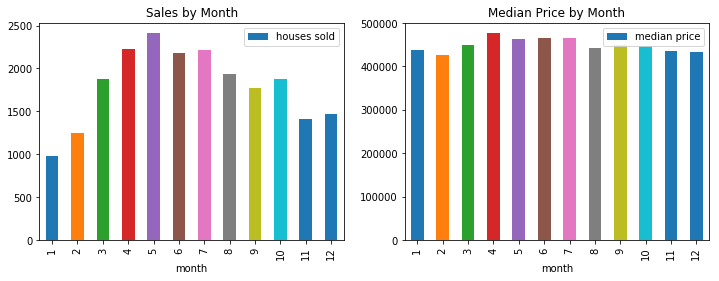

In [33]:
plt.figure(figsize=(12,4))
ax1 = plt.subplot(1, 2, 1)
sale_month.plot(x='month', y='houses sold',kind='bar',ax=ax1)
ax1.set_title("Sales by Month")

ax2 = plt.subplot(1, 2, 2)
sale_monthp.plot(x='month', y='median price',kind='bar',ax=ax2)
ax2.set_title('Median Price by Month')


In [ ]:
# sale_pcmonth = pd.pivot_table(kchouse,index=[kchouse.date.dt.month],values=["price" , "id"],aggfunc={"id":'count',"price":np.median})
# pd.pivot_table(df,index=["Manager","Status"],columns=["Product"],values=["Quantity","Price"],
#                aggfunc={"Quantity":len,"Price":np.sum},fill_value=0)`b`b`

In [ ]:
# to see how sales by month affect the popular 3 bedroom houses
#sale_monthbd = pd.pivot_table(kchouse,index=[kchouse.date.dt.month, kchouse.bedrooms==3],values=["price"],aggfunc=[np.median])

C:\Users\Omega\Anaconda3\envs\learn-env\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Omega\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 576x576 with 0 Axes>

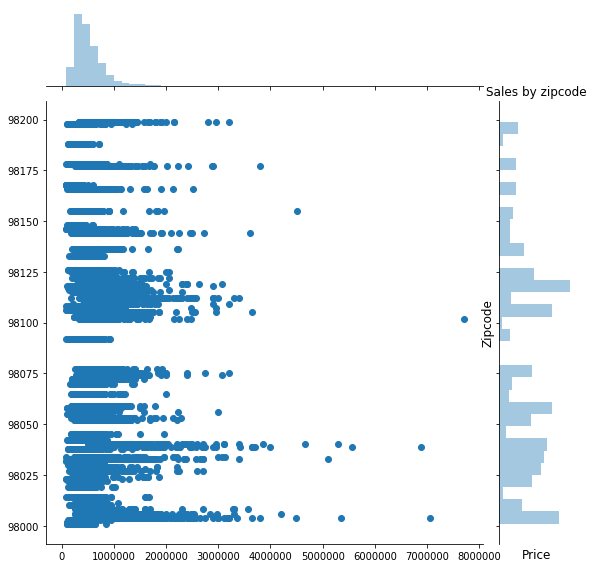

In [34]:
plt.figure(figsize=(8,8))
sns.jointplot(x= kchouse.price.values, y= kchouse.zipcode.values,size =8 )
plt.ylabel('Zipcode' , fontsize =12)
plt.xlabel('Price' , fontsize =12)
plt.title('Sales by zipcode')
plt.show()

The neighborhoods between zipcodes 98100 & 98125  this is the seattle neighborhood & looks like an ideal location. A lot of houses were sold there & the highest sale price is there as well.

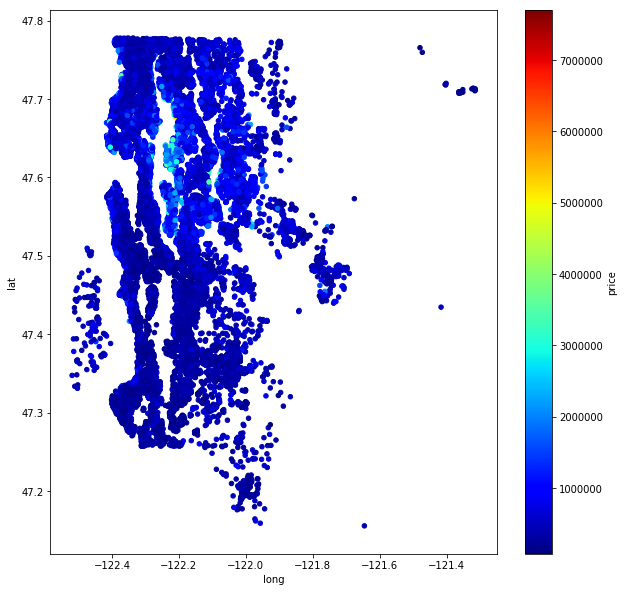

In [37]:
kchouse.plot( kind='scatter', x= 'long', y= 'lat', alpha = 5, figsize=(10,10), c ='price' , cmap=plt.get_cmap("jet"),colorbar=True , sharex = False)
# plt.figure(figsize=(8,8))
# sns.jointplot(x= kchouse.lat.values, y= kchouse.long.values,size =8 )
# plt.ylabel('Longitude' , fontsize =12)
# plt.xlabel('Latitude' , fontsize =12)
# plt.show()

Text(0.5, 1.0, 'Below average')

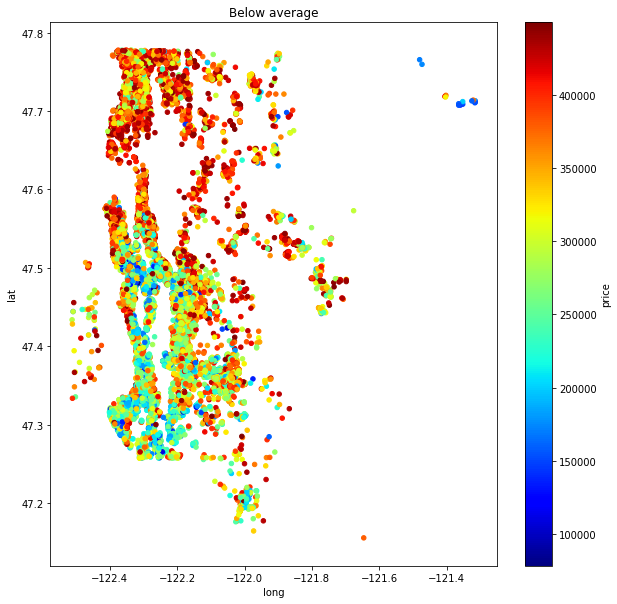

In [121]:
# plot of below average houses
kchouse_belm.plot( kind='scatter', x= 'long', y= 'lat', alpha = 5, figsize=(10,10), c ='price' , cmap=plt.get_cmap("jet"),colorbar=True , sharex = False)
plt.title('Below average')

Text(0.5, 1.0, 'above 1M')

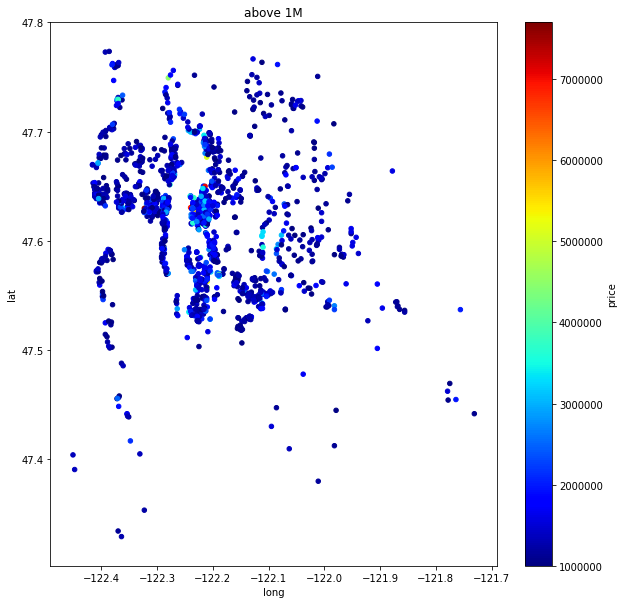

In [122]:
kchouse_abvm.plot( kind='scatter', x= 'long', y= 'lat', alpha = 5, figsize=(10,10), c ='price' , cmap=plt.get_cmap("jet"),colorbar=True , sharex = False)
plt.title('above 1M')

Text(0.5, 1.0, 'above 4M')

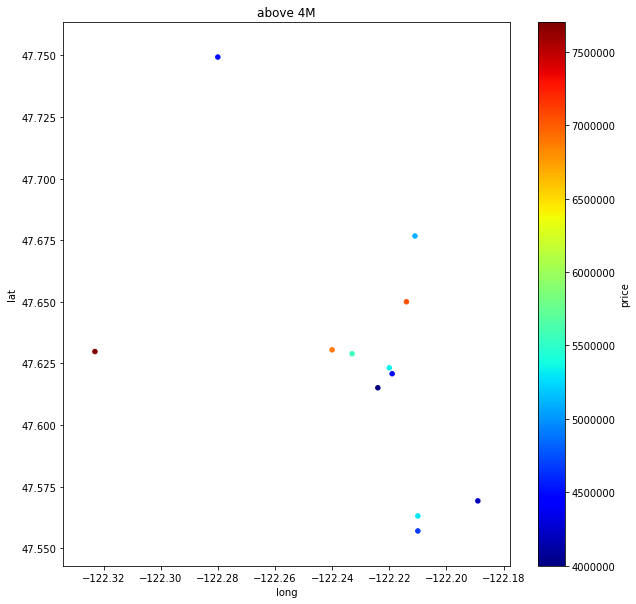

In [123]:
kchouse_abvfm.plot( kind='scatter', x= 'long', y= 'lat', alpha = 5, figsize=(10,10), c ='price' , cmap=plt.get_cmap("jet"),colorbar=True , sharex = False)
plt.title('above 4M')

 More houses are sold between latitude 47.5 to 47.8  and longitude of between -122 to-122.4

In [54]:
sale_ybuilt = kchouse.groupby(kchouse['yr_built']).agg({'price':'median', }).reset_index().rename(columns= {'price':'median price','yr_built':'year built'})
sale_ybuilt

,year built,median price
0,1900,549000.0
1,1901,550000.0
2,1902,624000.0
3,1903,461000.0
4,1904,478000.0
5,1905,597500.0
6,1906,555000.0
7,1907,595000.0
8,1908,519475.0
9,1909,575500.0


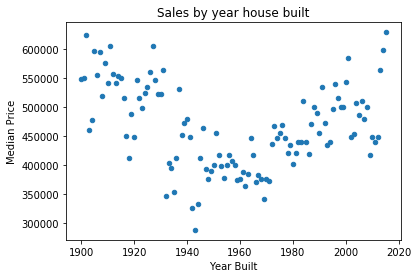

In [55]:
sale_ybuilt.plot(x='year built', y='median price',kind='scatter')
plt.xlabel('Year Built')
plt.ylabel('Median Price')
plt.title('Sales by year house built')
plt.show()

In [56]:
sale_view= kchouse.groupby('view').agg({'price': 'median'}).reset_index().rename(columns ={'price':'median price'})
sale_view

,view,median price
0,0.0,433000.0
1,1.0,691944.0
2,2.0,675000.0
3,3.0,802500.0
4,4.0,1180000.0


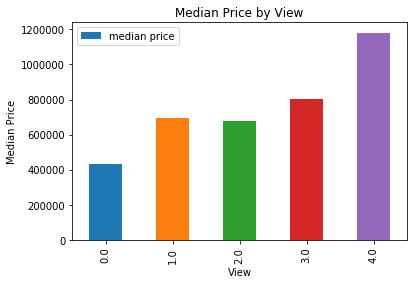

In [57]:
sale_view.plot(x='view', y='median price',kind='bar')
plt.xlabel('View')
plt.ylabel('Median Price')
plt.title('Median Price by View')
plt.show()

The expensive houses tend to get viewed more.

In [76]:
sale_grade = kchouse.groupby(kchouse['grade']).agg({'price':'median', }).reset_index().rename(columns= {'price':'median price','grade':'county grade'})

In [77]:
sale_grade

,county grade,median price
0,0,0.0
1,1,1.0
2,3,262000.0
3,4,194000.0
4,5,228700.0
5,6,275000.0
6,7,372000.0
7,8,505000.0
8,9,711000.0
9,10,902500.0


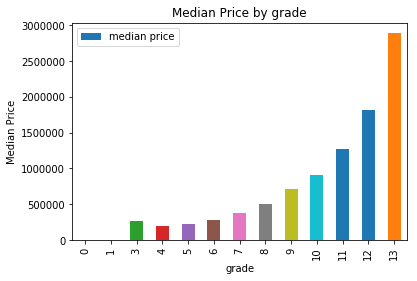

In [80]:
sale_grade.plot(x='county grade', y='median price',kind='bar')
plt.xlabel('grade')
plt.ylabel('Median Price')
plt.title('Median Price by grade')
plt.show()

In [58]:
kchouse.date.dt.year.unique()

array([2014, 2015], dtype=int64)

In [59]:
sorted(kchouse['yr_built'].unique())

[1900,
 1901,
 1902,
 1903,
 1904,
 1905,
 1906,
 1907,
 1908,
 1909,
 1910,
 1911,
 1912,
 1913,
 1914,
 1915,
 1916,
 1917,
 1918,
 1919,
 1920,
 1921,
 1922,
 1923,
 1924,
 1925,
 1926,
 1927,
 1928,
 1929,
 1930,
 1931,
 1932,
 1933,
 1934,
 1935,
 1936,
 1937,
 1938,
 1939,
 1940,
 1941,
 1942,
 1943,
 1944,
 1945,
 1946,
 1947,
 1948,
 1949,
 1950,
 1951,
 1952,
 1953,
 1954,
 1955,
 1956,
 1957,
 1958,
 1959,
 1960,
 1961,
 1962,
 1963,
 1964,
 1965,
 1966,
 1967,
 1968,
 1969,
 1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015]

In [61]:
kchouse['house_age'] =(kchouse.date.dt.year)-(kchouse['yr_built']) # to change the yr_built to continous variable by using age of the house


In [62]:
sorted(kchouse['house_age'].unique())

[-1,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115]

In [63]:
kchouse[kchouse['house_age']==-1]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,house_age
1761,1832100030,2014-06-25,597326.0,4,4.00,3570,8250,2.0,0.0,0.0,3,10,2860,710.0,2015,0.0,98040,47.5784,-122.226,2230,10000,6,-1
2685,3076500830,2014-10-29,385195.0,1,1.00,710,6000,1.5,0.0,0.0,3,6,710,0.0,2015,0.0,98144,47.5756,-122.316,1440,4800,10,-1
7519,9520900210,2014-12-31,614285.0,5,2.75,2730,6401,2.0,0.0,0.0,3,8,2730,0.0,2015,0.0,98072,47.7685,-122.160,2520,6126,12,-1
8032,1250200495,2014-06-24,455000.0,2,1.50,1200,1259,2.0,0.0,0.0,3,8,1000,200.0,2015,0.0,98144,47.6001,-122.298,1320,1852,6,-1
14475,2770601530,2014-08-26,500000.0,2,2.25,1570,1269,2.0,0.0,0.0,3,9,1280,290.0,2015,0.0,98199,47.6514,-122.385,1570,6000,8,-1
17084,9126100346,2014-06-17,350000.0,3,2.00,1380,3600,3.0,0.0,0.0,3,8,1380,0.0,2015,0.0,98122,47.6074,-122.305,1480,3600,6,-1
19789,9126100765,2014-08-01,455000.0,3,1.75,1320,1014,3.0,0.0,0.0,3,9,1320,0.0,2015,0.0,98122,47.6047,-122.305,1380,1495,8,-1
20754,9310300160,2014-08-28,357000.0,5,2.50,2990,9240,2.0,0.0,0.0,3,8,2990,0.0,2015,0.0,98133,47.7384,-122.348,1970,18110,8,-1
20836,1257201420,2014-07-09,595000.0,4,3.25,3730,4560,2.0,0.0,0.0,3,9,2760,970.0,2015,0.0,98103,47.6725,-122.330,1800,4560,7,-1
20947,6058600220,2014-07-31,230000.0,3,1.50,1040,1264,2.0,0.0,0.0,3,9,900,140.0,2015,0.0,98144,47.5951,-122.301,1350,3000,7,-1


There are 12 houses with the age  -1. all of the houses are sold in 2014 & built in 2015 this is very unlikely & the best thing to do is to change the age to 0.

In [64]:
kchouse[kchouse['house_age']==-1]=0

In [65]:
sorted(kchouse['house_age'].unique())

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115]

In [66]:
sale_age=kchouse.groupby('house_age').agg({'id':'count','price':'median'}).reset_index()

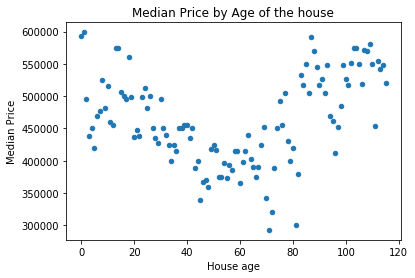

In [67]:
sale_age.plot(x='house_age', y='price',kind='scatter')
plt.xlabel('House age')
plt.ylabel('Median Price')
plt.title('Median Price by Age of the house')
plt.show()

Price is lowest for 40-60 yrs old houses. splited the data and try to see the reason but could't find that much info.

In [68]:
old_house=kchouse[kchouse.house_age > 80]  
old_house.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,house_age
count,2.867000e+03,2.867000e+03,2867.000000,2867.000000,2867.000000,2.867000e+03,2867.000000,2867.000000,2867.000000,2867.000000,2867.000000,2867.000000,2867.000000,2867.000000,2867.000000,2867.000000,2867.000000,2867.000000,2867.000000,2867.000000,2867.000000
mean,4.728547e+09,6.031290e+05,3.162190,1.705267,1772.277991,9.736418e+03,1.410359,0.008371,0.286013,3.703872,7.078479,1438.143007,1917.990931,213.371817,98111.381235,47.603592,-122.310947,1703.605162,7146.383676,6.664458,96.319847
std,2.929833e+09,3.960490e+05,1.097097,0.754858,829.919132,4.923852e+04,0.406448,0.091126,0.826858,0.816266,1.077807,630.105857,9.052220,616.288433,34.136688,0.095387,0.096395,528.537460,16880.727076,3.072581,9.066200
min,2.800031e+06,8.000000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.177600,-122.511000,700.000000,1062.000000,1.000000,81.000000
25%,2.161400e+09,3.850000e+05,2.000000,1.000000,1180.000000,3.864000e+03,1.000000,0.000000,0.000000,3.000000,6.000000,990.000000,1910.000000,0.000000,98105.000000,47.555400,-122.364000,1360.000000,4000.000000,4.000000,89.000000
50%,4.083304e+09,5.325000e+05,3.000000,1.750000,1620.000000,4.800000e+03,1.500000,0.000000,0.000000,4.000000,7.000000,1320.000000,1919.000000,0.000000,98115.000000,47.629800,-122.325000,1600.000000,4920.000000,7.000000,95.000000
75%,7.518505e+09,7.100000e+05,4.000000,2.000000,2170.000000,6.350000e+03,1.500000,0.000000,0.000000,4.000000,8.000000,1720.000000,1926.000000,0.000000,98122.000000,47.674000,-122.291500,1900.000000,6000.000000,9.000000,104.000000
max,9.842300e+09,7.700000e+06,11.000000,8.000000,12050.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,8570.000000,1934.000000,2015.000000,98199.000000,47.771200,-121.352000,5500.000000,425581.000000,12.000000,115.000000


In [ ]:
old_house.yr_renovated.mean()

In [71]:
mid_house=kchouse[kchouse['house_age'].between(40,60, inclusive = True)]
mid_house.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,house_age
count,4.848000e+03,4.848000e+03,4848.000000,4848.000000,4848.000000,4848.000000,4848.000000,4848.000000,4848.000000,4848.000000,4848.000000,4848.000000,4848.000000,4848.000000,4848.000000,4848.000000,4848.000000,4848.000000,4848.000000,4848.000000,4848.000000
mean,4.380548e+09,4.638895e+05,3.527847,1.844575,1905.988655,14281.623350,1.100351,0.007219,0.243812,3.647896,7.326320,1512.449051,1963.591584,65.205033,98069.493812,47.546546,-122.222315,1860.443688,12559.201114,6.562087,50.736386
std,2.810905e+09,2.950152e+05,0.861845,0.638436,720.272858,26676.854091,0.284722,0.084669,0.786703,0.688848,0.789053,517.328685,5.758773,355.296035,60.783991,0.145315,0.110572,551.615554,18305.741846,3.172092,5.728092
min,3.800008e+06,8.200000e+04,1.000000,0.750000,380.000000,1024.000000,1.000000,0.000000,0.000000,1.000000,4.000000,380.000000,1954.000000,0.000000,98001.000000,47.155900,-122.514000,460.000000,1173.000000,1.000000,40.000000
25%,1.953100e+09,2.750000e+05,3.000000,1.500000,1370.000000,7613.750000,1.000000,0.000000,0.000000,3.000000,7.000000,1170.000000,1959.000000,0.000000,98023.000000,47.440275,-122.309000,1460.000000,7700.000000,4.000000,46.000000
50%,3.819100e+09,3.900000e+05,3.000000,1.750000,1800.000000,9232.000000,1.000000,0.000000,0.000000,4.000000,7.000000,1390.000000,1963.000000,0.000000,98052.000000,47.551400,-122.218000,1780.000000,8979.500000,6.000000,51.000000
75%,7.140650e+09,5.500000e+05,4.000000,2.250000,2280.000000,11826.500000,1.000000,0.000000,0.000000,4.000000,8.000000,1710.000000,1968.000000,0.000000,98118.000000,47.674000,-122.157000,2140.000000,10826.250000,9.000000,55.000000
max,9.842300e+09,3.300000e+06,10.000000,6.250000,8670.000000,542322.000000,3.000000,1.000000,4.000000,5.000000,13.000000,6120.000000,1975.000000,2015.000000,98199.000000,47.777600,-121.315000,4660.000000,380279.000000,12.000000,60.000000


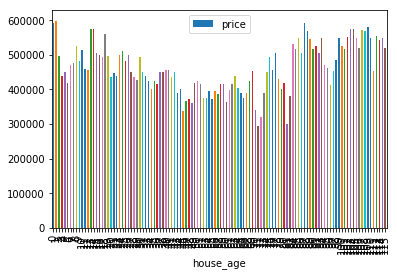

In [72]:
sale_age.plot(x='house_age', y='price',kind='bar')

In [73]:
kchouse[kchouse['yr_renovated'] > 0]=1

In [74]:
kchouse.yr_renovated.unique()

array([0., 1.])

# Identifying Catagorical variables

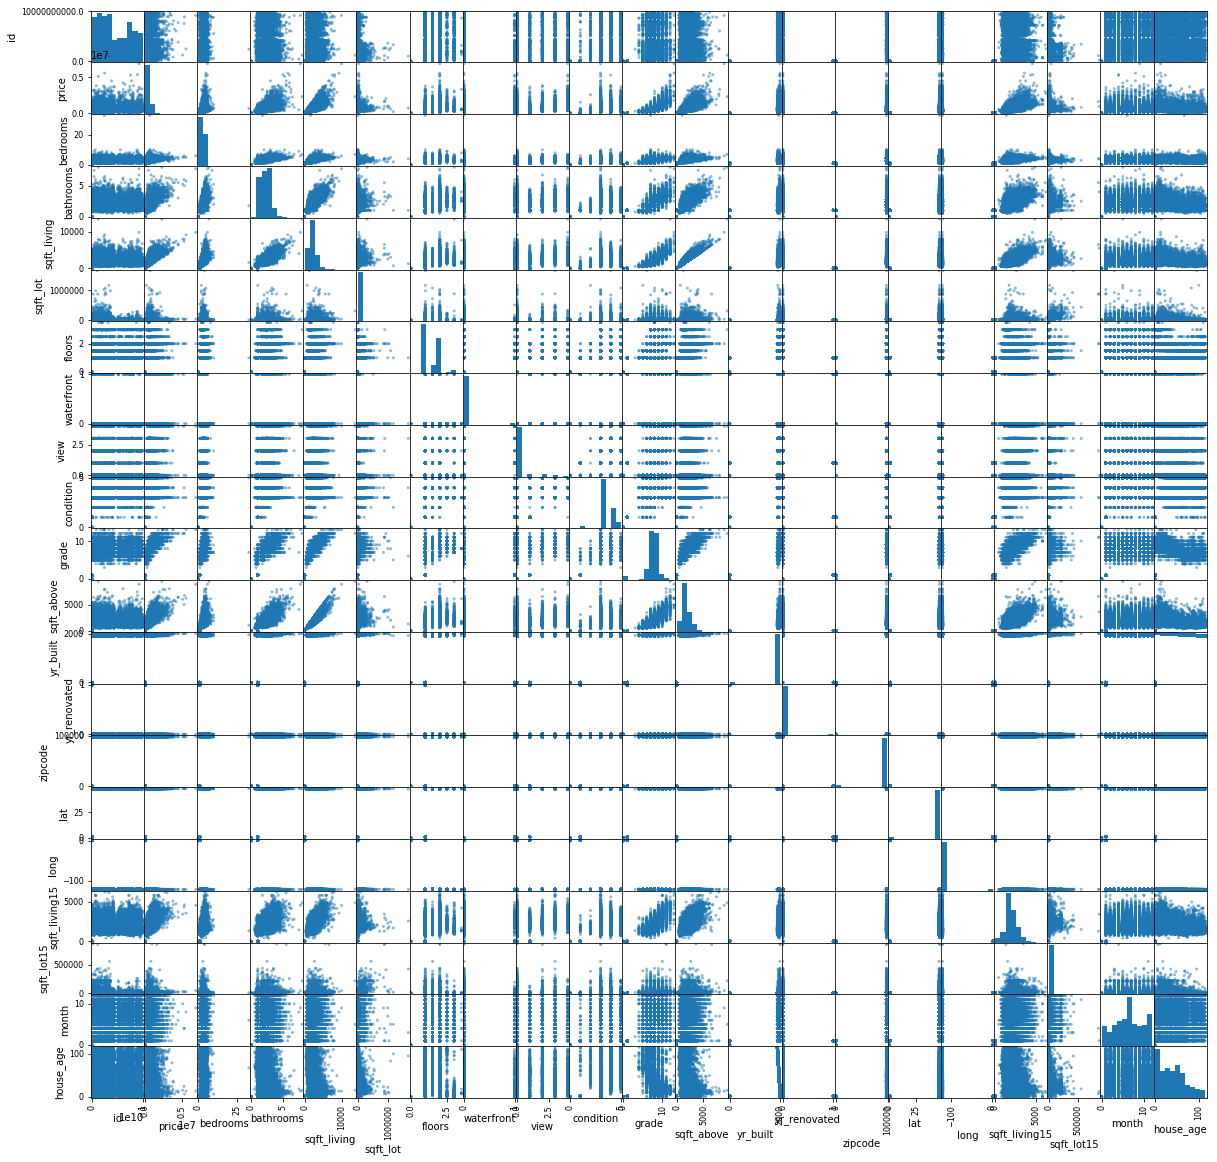

In [75]:
 pd.plotting.scatter_matrix(kchouse,figsize=[20,20]);

From the metrix above we learn that condition, floors ,water front, zipcode & view, year built & renovated are catagorical variable & need to create dummy variables for them. binning zipcode is complicated because the neighborhoods don't follow sequential zip code grouping & the price is affected by neighborhoods. So latitide will used instead.


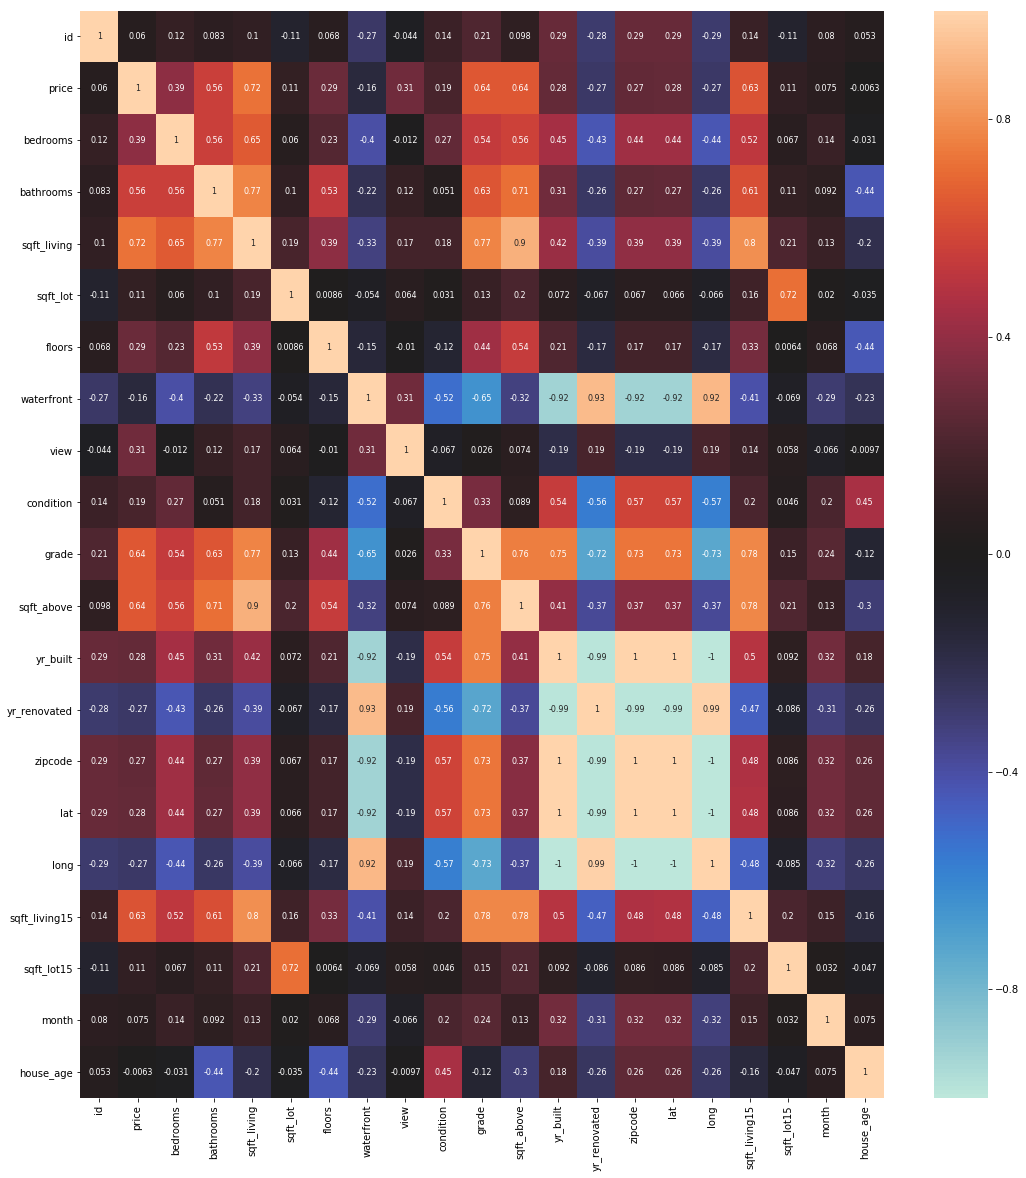

In [81]:
fig, ax = plt.subplots(figsize = (18, 20)) # to make the heatmap bigger
sns.heatmap(kchouse.corr(),center=0, annot=True, annot_kws={"size":8});

From the heat map we can learn that there is a strong positive correletion between the sale price and number of bathrooms. grade, square feet above the basement, square feet of living. Sqft_living being the highest.    

# Checking for  linearity & multicollinearity for continous variables
sqft_lot & house_age don't have linear relation ship with price and won't be used as feature variables and sqft_living15 & sqft_above shows multicolinearity with other variables & won't be used as feature variables as well.


### Log transformation for contionous variables

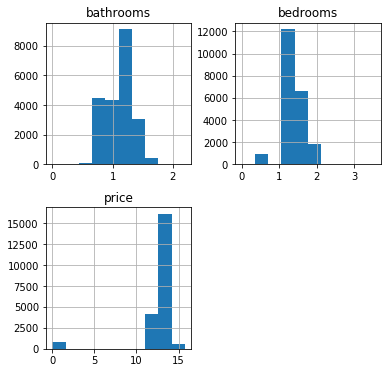

In [82]:
data_log = pd.DataFrame([])
data_log["price"] = np.log(kchouse["price"]+1)
data_log["bedrooms"] = np.log(kchouse["bedrooms"]+1)
data_log["bathrooms"] = np.log(kchouse["bathrooms"]+1)
data_log.hist(figsize  = [6, 6]);


***Normal distribution of the feature variables will improve the accuracy of the model. But the log transformation didn't improve the normality & I decided not to transform those features.  

## Creating dummy variables

In [84]:
kchouse['waterfront']=kchouse['waterfront'].astype('category')
kchouse['waterfront']=kchouse['waterfront'].cat.codes 
wf_dummy= pd.get_dummies(kchouse['waterfront'], prefix= 'waterfront')
kchouse= kchouse.drop(['waterfront'], axis =1)
kchouse=pd.concat([kchouse,wf_dummy],axis=1)

In [85]:
kchouse= kchouse.drop(['waterfront_1'], axis =1) # dropping one of the dummy variables bc of multicollinearity

In [86]:
kchouse['view']=kchouse['view'].astype('category')
kchouse['view']=kchouse['view'].cat.codes 
vw_dummy= pd.get_dummies(kchouse['view'], prefix= 'view')
kchouse= kchouse.drop(['view'], axis =1)
kchouse=pd.concat([kchouse,vw_dummy],axis=1)

In [87]:
kchouse= kchouse.drop(['view_4'], axis =1)

In [88]:
kchouse['condition']=kchouse['condition'].astype('category')
kchouse['condition']=kchouse['condition'].cat.codes 
cn_dummy= pd.get_dummies(kchouse['condition'], prefix= 'condition')
kchouse= kchouse.drop(['condition'], axis =1)
kchouse=pd.concat([kchouse,cn_dummy],axis=1)

In [89]:
kchouse= kchouse.drop(['condition_0'], axis =1)

In [90]:
kchouse['floors']=kchouse['floors'].astype('category')
kchouse['floors']=kchouse['floors'].cat.codes 
fl_dummy= pd.get_dummies(kchouse['floors'], prefix= 'floors')
kchouse= kchouse.drop(['floors'], axis =1)
kchouse=pd.concat([kchouse,fl_dummy],axis=1)

In [91]:
kchouse= kchouse.drop(['floors_0'], axis =1)

In [92]:
kchouse['yr_renovated']=kchouse['yr_renovated'].astype('category')
kchouse['yr_renovated']=kchouse['yr_renovated'].cat.codes 
yr_dummy= pd.get_dummies(kchouse['yr_renovated'], prefix= 'yr_renovated')
kchouse= kchouse.drop(['yr_renovated'], axis =1)
kchouse=pd.concat([kchouse,yr_dummy],axis=1)

In [93]:
kchouse= kchouse.drop(['yr_renovated_1'], axis =1)

C:\Users\Omega\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


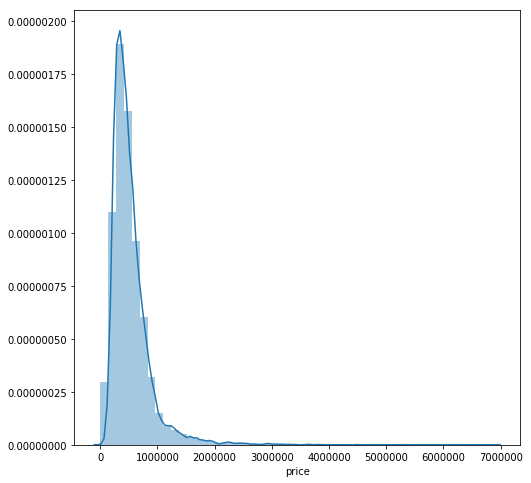

In [94]:
fig, ax = plt.subplots(figsize = (8, 8)) # to make the plot bigger
ax= sns.distplot(kchouse.price) # distribution plot to checking the distribution of the target variable 'price'.

Sale price is a little skewed to the left with few outliers.

#  Checking for correlation with target variable

In [95]:
kchouse_corr = kchouse.corr()
# (abs(kchouse.corr())['price']).sort_values(asending= True)
all_corr=kchouse_corr['price'].sort_values(ascending = False)
all_corr

price             1.000000
sqft_living       0.724843
sqft_above        0.644164
grade             0.642642
sqft_living15     0.629368
bathrooms         0.557026
bedrooms          0.387237
yr_built          0.277564
lat               0.277004
zipcode           0.272038
yr_renovated_0    0.269957
floors_3          0.266089
view_3            0.175321
waterfront_0      0.158272
view_2            0.151591
floors_4          0.114365
sqft_lot          0.110580
sqft_lot15        0.108480
condition_5       0.076571
month             0.074636
condition_3       0.066216
id                0.060463
floors_5          0.032434
floors_2          0.031008
floors_6          0.019877
condition_4       0.004681
house_age        -0.006254
condition_2      -0.045549
view_0           -0.153031
view_1           -0.178668
condition_1      -0.268485
long             -0.271984
floors_1         -0.302284
Name: price, dtype: float64

In [96]:
all_corr.index

Index(['price', 'sqft_living', 'sqft_above', 'grade', 'sqft_living15',
       'bathrooms', 'bedrooms', 'yr_built', 'lat', 'zipcode', 'yr_renovated_0',
       'floors_3', 'view_3', 'waterfront_0', 'view_2', 'floors_4', 'sqft_lot',
       'sqft_lot15', 'condition_5', 'month', 'condition_3', 'id', 'floors_5',
       'floors_2', 'floors_6', 'condition_4', 'house_age', 'condition_2',
       'view_0', 'view_1', 'condition_1', 'long', 'floors_1'],
      dtype='object')

In [107]:
# after removing sqft_lot and house_age (no linear relationship) sqft_living15, sqft_above (multicollinearity) from all_corr  
feature_fin=['sqft_living', 'grade','bathrooms', 'bedrooms', 'lat', 'yr_renovated_0',
       'floors_3', 'view_3', 'waterfront_0', 'view_2', 'floors_4', 'condition_5', 'condition_3', 'floors_5',
       'floors_2', 'floors_6', 'condition_4', 'condition_2',
       'view_0', 'view_1', 'condition_1', 'long', 'floors_1']

In [100]:
# selecting features by correlation 
low_corr =list(kchouse_corr[abs(kchouse.corr()) >= 0.2]['price'].dropna().reset_index()['index'])
low_corr.remove('price')
low_corr

['price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'grade',
 'sqft_above',
 'yr_built',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'condition_1',
 'floors_1',
 'floors_3',
 'yr_renovated_0']

In [104]:
#after removing the non linear & multicolinear variablesfrom low_corr 
best_corr=['bedrooms',
 'bathrooms',
 'sqft_living',
 'grade',
 'lat',
 'long',
 'condition_1',
 'floors_1',
 'floors_3',
 'yr_renovated_0']

In [ ]:
# from statsmodels.formula.api import ols
# outcome = 'price'
# predictors = '+'.join(med_corrl)
# formula = outcome + '~' + predictors
# model =ols(formula=formula, data=kchouse).fit()
# model.summary()


In [108]:
x=kchouse[best_corr]
y= kchouse['price']
import statsmodels.api as sm
X =sm.add_constant(x)
modelb = sm.OLS(y, X).fit()
modelb.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     3612.
Date:                Fri, 26 Jul 2019   Prob (F-statistic):               0.00
Time:                        13:31:50   Log-Likelihood:            -2.9629e+05
No. Observations:               21597   AIC:                         5.926e+05
Df Residuals:                   21586   BIC:                         5.927e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -7.268e+05   4.57e+04    -15.910      0.000   -8.16e+05   -6.37e+05
bedrooms       -3.668e+04   2099.805    -17.470      0.000   -4.08e+04   -3.26e+04
bathrooms      -2483.3159   3335.613     -0.744      0.457   -9021.364    4054.733
sqft_living      206.6039      3.296     62.687      0.000     200.144     213.064
grade           9.692e+04   2169.185     44.682      0.000    9.27e+04    1.01e+05
lat             4.673e+05   1.09e+04     42.889      0.000    4.46e+05    4.89e+05
long            1.844e+05   4255.148     43.330      0.000    1.76e+05    1.93e+05
condition_1     8.422e+04   4.16e+04      2.022      0.043    2579.950    1.66e+05
floors_1       -6.709e+04   4912.094    -13.658      0.000   -7.67e+04   -5.75e+04
floors_3        -1.48e+05   5276.649    -28.050      0.000   -1.58e+05   -1.38e+05
yr_renovated_0  6.149e+05   7.84e+04      7.842      0.000    4.61e+05    7.69e+05
==============================================================================
Omnibus:                    17584.629   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           991467.892
Skew:                           3.524   Prob(JB):                         0.00
Kurtosis:                      35.436   Cond. No.                     1.32e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\Omega\Anaconda3\envs\learn-env\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


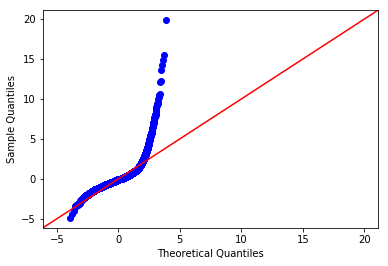

In [106]:
import scipy.stats as stats
res=modelb.resid
# fig=sm.qqplot(res)
fig = sm.graphics.qqplot(res, dist=stats.norm, line='45', fit=True)
fig.show()

In [109]:
x=kchouse[feature_fin]
y= kchouse['price']
import statsmodels.api as sm
X =sm.add_constant(x)
modelf = sm.OLS(y, X).fit()
modelf.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     2362.
Date:                Fri, 26 Jul 2019   Prob (F-statistic):               0.00
Time:                        13:32:00   Log-Likelihood:            -2.9367e+05
No. Observations:               21597   AIC:                         5.874e+05
Df Residuals:                   21574   BIC:                         5.876e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           5.179e+07   1.32e+06     39.288      0.000    4.92e+07    5.44e+07
sqft_living      179.9658      3.050     59.005      0.000     173.988     185.944
grade           9.487e+04   1966.826     48.234      0.000     9.1e+04    9.87e+04
bathrooms       9091.0105   3063.763      2.967      0.003    3085.809    1.51e+04
bedrooms       -2.958e+04   1884.789    -15.697      0.000   -3.33e+04   -2.59e+04
lat             6.175e+05      1e+04     61.629      0.000    5.98e+05    6.37e+05
yr_renovated_0 -5.089e+07   1.32e+06    -38.613      0.000   -5.35e+07   -4.83e+07
floors_3       -2.373e+07   5.95e+05    -39.896      0.000   -2.49e+07   -2.26e+07
view_3         -1.869e+05   1.65e+04    -11.311      0.000   -2.19e+05   -1.55e+05
waterfront_0   -5.613e+05   2.16e+04    -26.006      0.000   -6.04e+05   -5.19e+05
view_2         -2.516e+05   1.55e+04    -16.231      0.000   -2.82e+05   -2.21e+05
floors_4       -2.355e+07   5.96e+05    -39.530      0.000   -2.47e+07   -2.24e+07
condition_5    -2.834e+07   7.15e+05    -39.627      0.000   -2.97e+07   -2.69e+07
condition_3    -2.844e+07   7.15e+05    -39.798      0.000   -2.98e+07    -2.7e+07
floors_5       -2.374e+07   5.96e+05    -39.797      0.000   -2.49e+07   -2.26e+07
floors_2       -2.366e+07   5.96e+05    -39.710      0.000   -2.48e+07   -2.25e+07
floors_6       -2.355e+07      6e+05    -39.231      0.000   -2.47e+07   -2.24e+07
condition_4    -2.839e+07   7.15e+05    -39.720      0.000   -2.98e+07    -2.7e+07
condition_2    -2.839e+07   7.15e+05    -39.714      0.000   -2.98e+07    -2.7e+07
view_0         -3.351e+05   1.44e+04    -23.251      0.000   -3.63e+05   -3.07e+05
view_1         -2.195e+05    1.8e+04    -12.198      0.000   -2.55e+05   -1.84e+05
condition_1    -2.837e+07   7.16e+05    -39.640      0.000   -2.98e+07    -2.7e+07
long           -1.821e+05   1.04e+04    -17.431      0.000   -2.03e+05   -1.62e+05
floors_1       -2.371e+07   5.95e+05    -39.831      0.000   -2.49e+07   -2.25e+07
==============================================================================
Omnibus:                    16949.183   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1135505.831
Skew:                           3.256   Prob(JB):                         0.00
Kurtosis:                      37.921   Cond. No.                     6.83e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.3e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

C:\Users\Omega\Anaconda3\envs\learn-env\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


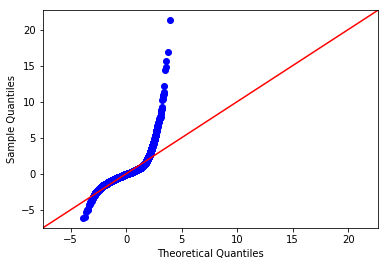

In [110]:
import scipy.stats as stats
res=modelf.resid
# fig=sm.qqplot(res)
fig = sm.graphics.qqplot(res, dist=stats.norm, line='45', fit=True)
fig.show()

In [111]:
import statsmodels.api as sm

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included




In [112]:
X = kchouse[feature_fin]
y = kchouse["price"]
result = stepwise_selection(X, y, verbose = True)
print('resulting features:')


Add  floors_3                       with p-value 0.0
Add  sqft_living                    with p-value 0.0
Add  grade                          with p-value 1.07018e-218
Add  long                           with p-value 0.0
Add  waterfront_0                   with p-value 0.0
Add  lat                            with p-value 0.0
Add  view_0                         with p-value 6.80403e-177
Add  yr_renovated_0                 with p-value 2.29094e-137
Add  condition_3                    with p-value 9.95041e-105
Add  floors_1                       with p-value 2.41761e-45
Add  bedrooms                       with p-value 1.09939e-49
Add  condition_5                    with p-value 6.11441e-33
Add  view_2                         with p-value 6.21939e-26
Add  floors_4                       with p-value 5.73179e-11
Add  view_3                         with p-value 1.74593e-07
Add  view_1                         with p-value 1.24801e-29
Add  floors_5                       with p-value 2.71069e-07

In [113]:
print(result)

['floors_3', 'sqft_living', 'grade', 'long', 'waterfront_0', 'lat', 'view_0', 'yr_renovated_0', 'condition_3', 'floors_1', 'bedrooms', 'condition_5', 'view_2', 'floors_4', 'view_3', 'view_1', 'floors_5', 'floors_2', 'floors_6', 'bathrooms']


In [114]:
X= kchouse[feature_fin]
y= kchouse['price']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)
#A brief preview of our train test split
print(len(X_train), len(X_test), len(y_train), len(y_test))



16197 5400 16197 5400


In [116]:
#Importing and initializing the model class
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()


In [117]:
#Fitting the model to the train data
linreg.fit(X_train, y_train)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
# Calculating predictions on the train set, and on the test set
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)
# Calculating your residuals
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test


In [118]:
# Calculating the Mean Squared Error
from sklearn.metrics import mean_squared_error
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)


Train Mean Squarred Error: 37782970815.50129
Test Mean Squarred Error: 38237023153.83037


##### Conclusion

I used two different models one according to the correlation(modelb) & the other one is almost all variables except the nonlinear & multicolinear variables(modelf).  
modelb:adjusted R   0.63 AIC 5.9e05  BIC 5.9e05 pvalue less than .05 Skewnes 3.5 kurtosis 35.43
modelf:adjusted R2   0.71 AIC 5.8e05  BIC 5.8e05 pvalue less all 0 Skew 3.2 kurtosis 37.43
modelf has higher adjusted r square, lower BIC,AIC & skewness. So I chose modelf as my model.
I am looking forward to learn more skill in the next modules of the curriculum to improve my model.

